<a href="https://colab.research.google.com/github/Harshsoni38/Next-Word-Prediction-Model-using-LSTM-Neural-Networks/blob/main/Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Word Prediction:

### Importing The Required Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [ ]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)

print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  ﻿One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


### Cleaning the data:

In [ ]:
data = ""

for i in lines:
    data = ' '. join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [ ]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [ ]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)

data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization:

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [ ]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [ ]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [ 17  53 293   2  18]
The responses are:  [ 53 293   2  18 729]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Creating the Model:

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

model.build(input_shape=(None, 1))  # <-- Build explicitly

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1, 10)          │        26,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 1000)        │     4,044,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1000)           │     8,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2617)           │     2,619,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,694,787 (59.87 MB)

 Trainable params: 15,694,787 (59.87 MB)

 Non-trainable params: 0 (0.00 B)

### Plot The Model:

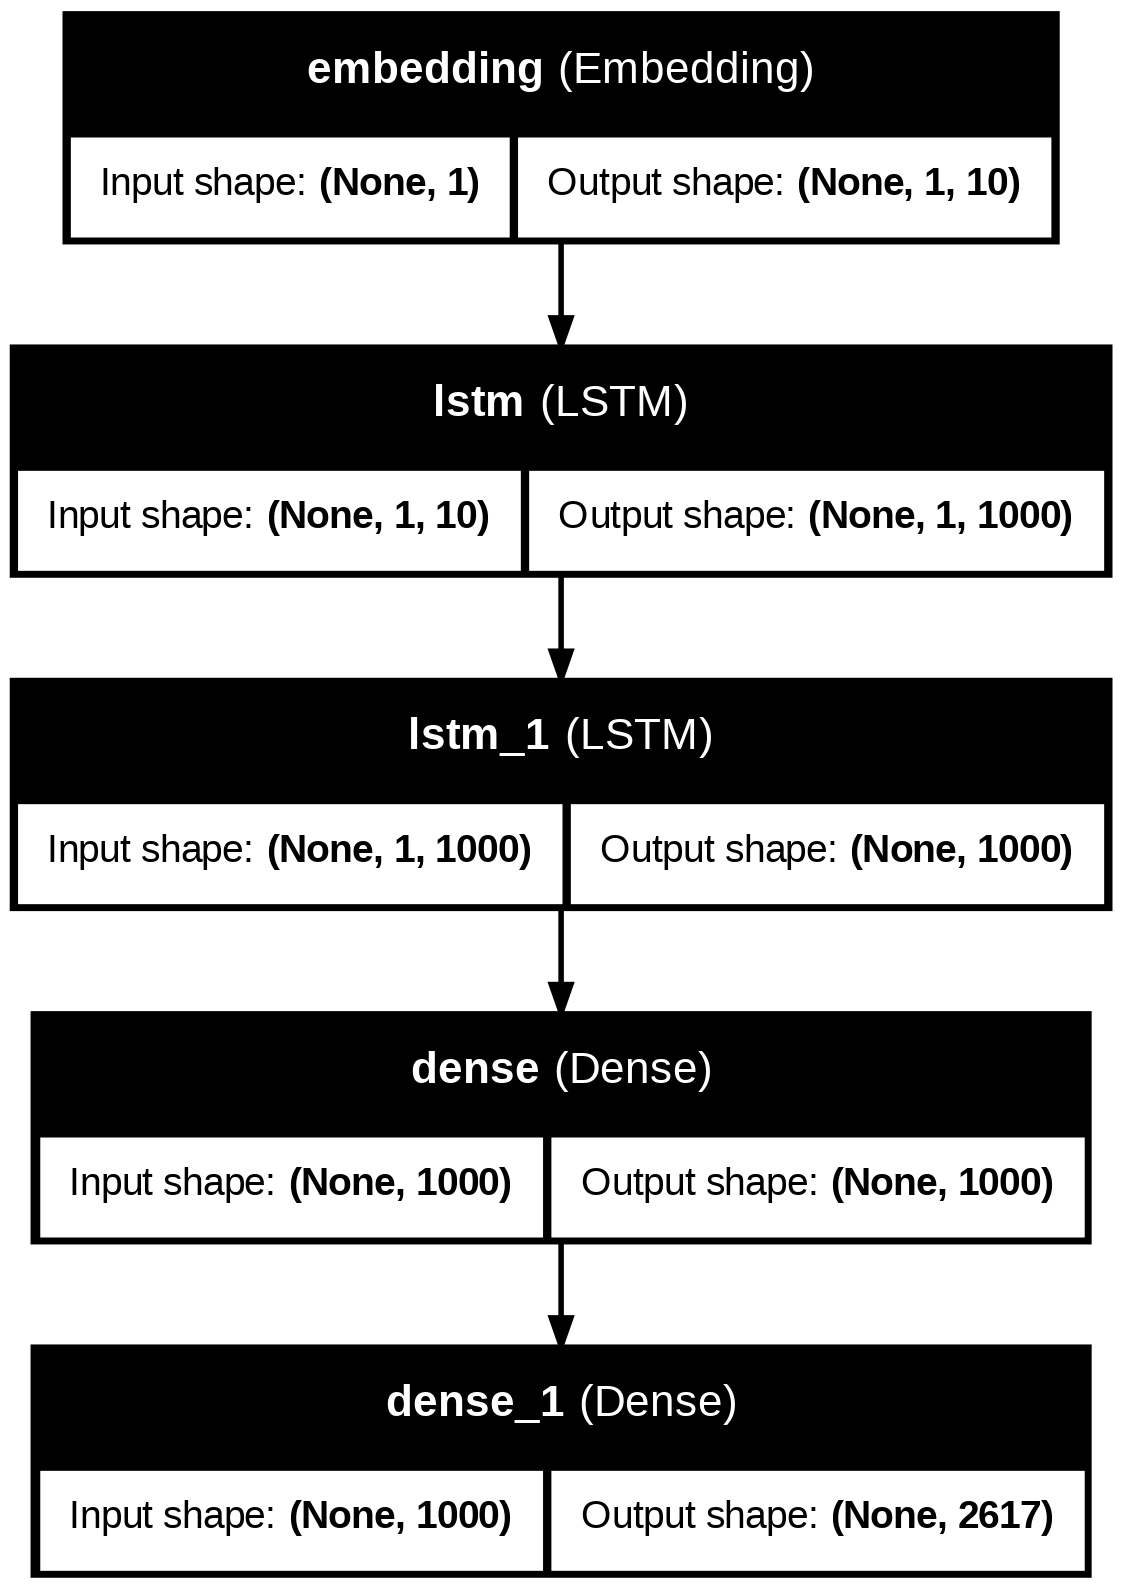

In [ ]:
# Assuming 'model' is already defined
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,       # shows input/output shapes
    show_layer_names=True,  # shows layer names
    expand_nested=True      # optional, shows nested models clearly
)


### Callbacks:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Compile The Model:

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


### Fit The Model:

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 5.0052e-04 - loss: 7.8721
Epoch 1: loss improved from inf to 7.87517, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 5.0903e-04 - loss: 7.8722 - learning_rate: 0.0010
Epoch 2/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0025 - loss: 7.8638
Epoch 2: loss improved from 7.87517 to 7.86434, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0025 - loss: 7.8638 - learning_rate: 0.0010
Epoch 3/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0034 - loss: 7.8261
Epoch 3: loss improved from 7.86434 to 7.82670, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0034 - loss: 7.8261 - learning_rate: 0.0010
Epoch 4/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0030 - loss: 7.6351
Epoch 4: loss improved from 7.82670 to 7.62103, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0030 - loss: 7.6349 - learning_rate: 0.0010
Epoch 5/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0028 - loss: 7.3894
Epoch 5: loss improved from 7.62103 to 7.41029, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.0028 - loss: 7.3901 - learning_rate: 0.0010
Epoch 6/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0020 - loss: 7.2116
Epoch 6: loss improved from 7.41029 to 7.23751, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0020 - loss: 7.2120 - learning_rate: 0.0010
Epoch 7/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0016 - loss: 7.1047
Epoch 7: loss improved from 7.23751 to 7.12840, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0016 - loss: 7.1050 - learning_rate: 0.0010
Epoch 8/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0032 - loss: 7.0385
Epoch 8: loss improved from 7.12840 to 7.05553, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.0031 - loss: 7.0387 - learning_rate: 0.0010
Epoch 9/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0039 - loss: 6.9238
Epoch 9: loss improved from 7.05553 to 6.97857, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0039 - loss: 6.9256 - learning_rate: 0.0010
Epoch 10/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0048 - loss: 6.8686
Epoch 10: loss improved from 6.97857 to 6.90691, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0048 - loss: 6.8692 - learning_rate: 0.0010
Epoch 11/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0042 - loss: 6.7887
Epoch 11: loss improved from 6.90691 to 6.82350, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0042 - loss: 6.7892 - learning_rate: 0.0010
Epoch 12/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0043 - loss: 6.6950
Epoch 12: loss improved from 6.82350 to 6.75010, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0043 - loss: 6.6959 - learning_rate: 0.0010
Epoch 13/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0090 - loss: 6.5761
Epoch 13: loss improved from 6.75010 to 6.65040, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.0089 - loss: 6.5773 - learning_rate: 0.0010
Epoch 14/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0083 - loss: 6.5022
Epoch 14: loss improved from 6.65040 to 6.55141, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0083 - loss: 6.5030 - learning_rate: 0.0010
Epoch 15/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0089 - loss: 6.3219
Epoch 15: loss improved from 6.55141 to 6.41723, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0089 - loss: 6.3235 - learning_rate: 0.0010
Epoch 16/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0070 - loss: 6.2040
Epoch 16: loss improved from 6.41723 to 6.28744, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0070 - loss: 6.2053 - learning_rate: 0.0010
Epoch 17/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0134 - loss: 6.0276
Epoch 17: loss improved from 6.28744 to 6.09887, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.0133 - loss: 6.0287 - learning_rate: 0.0010
Epoch 18/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0120 - loss: 5.8641
Epoch 18: loss improved from 6.09887 to 5.93202, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0120 - loss: 5.8652 - learning_rate: 0.0010
Epoch 19/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0178 - loss: 5.6651
Epoch 19: loss improved from 5.93202 to 5.74257, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0177 - loss: 5.6663 - learning_rate: 0.0010
Epoch 20/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0235 - loss: 5.4488
Epoch 20: loss improved from 5.74257 to 5.55160, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0234 - loss: 5.4504 - learning_rate: 0.0010
Epoch 21/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0292 - loss: 5.3077
Epoch 21: loss improved from 5.55160 to 5.44454, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.0290 - loss: 5.3099 - learning_rate: 0.0010
Epoch 22/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0289 - loss: 5.1757
Epoch 22: loss improved from 5.44454 to 5.30476, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.0288 - loss: 5.1778 - learning_rate: 0.0010
Epoch 23/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0269 - loss: 5.0703
Epoch 23: loss improved from 5.30476 to 5.20366, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0268 - loss: 5.0724 - learning_rate: 0.0010
Epoch 24/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0335 - loss: 4.9114
Epoch 24: loss improved from 5.20366 to 5.07677, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0333 - loss: 4.9141 - learning_rate: 0.0010
Epoch 25/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0434 - loss: 4.8058
Epoch 25: loss improved from 5.07677 to 4.97086, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0432 - loss: 4.8085 - learning_rate: 0.0010
Epoch 26/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0511 - loss: 4.6824
Epoch 26: loss improved from 4.97086 to 4.84997, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.0508 - loss: 4.6851 - learning_rate: 0.0010
Epoch 27/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0435 - loss: 4.6281
Epoch 27: loss improved from 4.84997 to 4.78206, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0434 - loss: 4.6306 - learning_rate: 0.0010
Epoch 28/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0478 - loss: 4.5233
Epoch 28: loss improved from 4.78206 to 4.69271, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0476 - loss: 4.5261 - learning_rate: 0.0010
Epoch 29/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0580 - loss: 4.4259
Epoch 29: loss improved from 4.69271 to 4.61411, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.0577 - loss: 4.4290 - learning_rate: 0.0010
Epoch 30/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0560 - loss: 4.3807
Epoch 30: loss improved from 4.61411 to 4.52472, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0558 - loss: 4.3830 - learning_rate: 0.0010
Epoch 31/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0758 - loss: 4.2369
Epoch 31: loss improved from 4.52472 to 4.45708, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0753 - loss: 4.2405 - learning_rate: 0.0010
Epoch 32/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0641 - loss: 4.2509
Epoch 32: loss improved from 4.45708 to 4.41421, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0639 - loss: 4.2535 - learning_rate: 0.0010
Epoch 33/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0748 - loss: 4.1984
Epoch 33: loss improved from 4.41421 to 4.36040, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0744 - loss: 4.2011 - learning_rate: 0.0010
Epoch 34/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0748 - loss: 4.0661
Epoch 34: loss improved from 4.36040 to 4.29582, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.0744 - loss: 4.0698 - learning_rate: 0.0010
Epoch 35/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0796 - loss: 4.0700
Epoch 35: loss improved from 4.29582 to 4.23355, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0792 - loss: 4.0726 - learning_rate: 0.0010
Epoch 36/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0869 - loss: 3.9874
Epoch 36: loss improved from 4.23355 to 4.18179, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0865 - loss: 3.9906 - learning_rate: 0.0010
Epoch 37/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0899 - loss: 3.9490
Epoch 37: loss improved from 4.18179 to 4.13273, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0896 - loss: 3.9520 - learning_rate: 0.0010
Epoch 38/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0914 - loss: 3.9176
Epoch 38: loss improved from 4.13273 to 4.09985, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0910 - loss: 3.9205 - learning_rate: 0.0010
Epoch 39/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0979 - loss: 3.8437
Epoch 39: loss improved from 4.09985 to 4.03017, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0975 - loss: 3.8467 - learning_rate: 0.0010
Epoch 40/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0959 - loss: 3.7936
Epoch 40: loss improved from 4.03017 to 3.98980, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.0955 - loss: 3.7968 - learning_rate: 0.0010
Epoch 41/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1067 - loss: 3.7158
Epoch 41: loss improved from 3.98980 to 3.93630, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1063 - loss: 3.7193 - learning_rate: 0.0010
Epoch 42/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1136 - loss: 3.6720
Epoch 42: loss improved from 3.93630 to 3.87573, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1131 - loss: 3.6752 - learning_rate: 0.0010
Epoch 43/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1152 - loss: 3.6331
Epoch 43: loss improved from 3.87573 to 3.83701, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.1147 - loss: 3.6364 - learning_rate: 0.0010
Epoch 44/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1097 - loss: 3.6197
Epoch 44: loss improved from 3.83701 to 3.79334, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1094 - loss: 3.6225 - learning_rate: 0.0010
Epoch 45/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1288 - loss: 3.5564
Epoch 45: loss improved from 3.79334 to 3.75512, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.1283 - loss: 3.5596 - learning_rate: 0.0010
Epoch 46/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1279 - loss: 3.4717
Epoch 46: loss improved from 3.75512 to 3.67712, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1271 - loss: 3.4783 - learning_rate: 0.0010
Epoch 47/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1435 - loss: 3.4317
Epoch 47: loss improved from 3.67712 to 3.62702, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.1430 - loss: 3.4348 - learning_rate: 0.0010
Epoch 48/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1548 - loss: 3.3719
Epoch 48: loss improved from 3.62702 to 3.60736, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1541 - loss: 3.3757 - learning_rate: 0.0010
Epoch 49/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1408 - loss: 3.3622
Epoch 49: loss improved from 3.60736 to 3.52930, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.1404 - loss: 3.3649 - learning_rate: 0.0010
Epoch 50/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1713 - loss: 3.2118
Epoch 50: loss improved from 3.52930 to 3.41431, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1707 - loss: 3.2150 - learning_rate: 0.0010
Epoch 51/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1658 - loss: 3.1344
Epoch 51: loss improved from 3.41431 to 3.35617, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.1654 - loss: 3.1380 - learning_rate: 0.0010
Epoch 52/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1858 - loss: 3.1153
Epoch 52: loss improved from 3.35617 to 3.33093, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1852 - loss: 3.1188 - learning_rate: 0.0010
Epoch 53/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2000 - loss: 3.0705
Epoch 53: loss improved from 3.33093 to 3.25812, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.1993 - loss: 3.0735 - learning_rate: 0.0010
Epoch 54/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2144 - loss: 2.9538
Epoch 54: loss improved from 3.25812 to 3.14989, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2136 - loss: 2.9570 - learning_rate: 0.0010
Epoch 55/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2213 - loss: 2.9052
Epoch 55: loss improved from 3.14989 to 3.10729, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.2206 - loss: 2.9085 - learning_rate: 0.0010
Epoch 56/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2302 - loss: 2.8392
Epoch 56: loss improved from 3.10729 to 3.07375, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2293 - loss: 2.8429 - learning_rate: 0.0010
Epoch 57/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2296 - loss: 2.8158
Epoch 57: loss improved from 3.07375 to 3.01182, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.2289 - loss: 2.8190 - learning_rate: 0.0010
Epoch 58/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2460 - loss: 2.7469
Epoch 58: loss improved from 3.01182 to 2.94473, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2443 - loss: 2.7533 - learning_rate: 0.0010
Epoch 59/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2708 - loss: 2.6335
Epoch 59: loss improved from 2.94473 to 2.87783, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2698 - loss: 2.6375 - learning_rate: 0.0010
Epoch 60/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2611 - loss: 2.6429
Epoch 60: loss improved from 2.87783 to 2.83529, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.2602 - loss: 2.6460 - learning_rate: 0.0010
Epoch 61/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2718 - loss: 2.5626
Epoch 61: loss improved from 2.83529 to 2.77828, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2710 - loss: 2.5661 - learning_rate: 0.0010
Epoch 62/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2892 - loss: 2.4774
Epoch 62: loss improved from 2.77828 to 2.71461, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.2882 - loss: 2.4812 - learning_rate: 0.0010
Epoch 63/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3042 - loss: 2.4748
Epoch 63: loss improved from 2.71461 to 2.67502, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3032 - loss: 2.4780 - learning_rate: 0.0010
Epoch 64/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3075 - loss: 2.4282
Epoch 64: loss improved from 2.67502 to 2.61007, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3056 - loss: 2.4340 - learning_rate: 0.0010
Epoch 65/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3222 - loss: 2.3701
Epoch 65: loss improved from 2.61007 to 2.56160, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.3211 - loss: 2.3732 - learning_rate: 0.0010
Epoch 66/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3276 - loss: 2.3001
Epoch 66: loss improved from 2.56160 to 2.53504, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.3264 - loss: 2.3039 - learning_rate: 0.0010
Epoch 67/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3047 - loss: 2.3233
Epoch 67: loss improved from 2.53504 to 2.49002, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3040 - loss: 2.3260 - learning_rate: 0.0010
Epoch 68/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3359 - loss: 2.2405
Epoch 68: loss improved from 2.49002 to 2.45021, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.3348 - loss: 2.2439 - learning_rate: 0.0010
Epoch 69/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3385 - loss: 2.2046
Epoch 69: loss improved from 2.45021 to 2.40694, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3375 - loss: 2.2078 - learning_rate: 0.0010
Epoch 70/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3443 - loss: 2.1503
Epoch 70: loss improved from 2.40694 to 2.35973, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3433 - loss: 2.1537 - learning_rate: 0.0010
Epoch 71/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3587 - loss: 2.1005
Epoch 71: loss improved from 2.35973 to 2.30535, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3575 - loss: 2.1038 - learning_rate: 0.0010
Epoch 72/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3563 - loss: 2.0693
Epoch 72: loss improved from 2.30535 to 2.23362, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.3554 - loss: 2.0719 - learning_rate: 0.0010
Epoch 73/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3583 - loss: 2.0259
Epoch 73: loss improved from 2.23362 to 2.21041, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3574 - loss: 2.0289 - learning_rate: 0.0010
Epoch 74/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3802 - loss: 1.9942
Epoch 74: loss improved from 2.21041 to 2.19204, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3792 - loss: 1.9974 - learning_rate: 0.0010
Epoch 75/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3909 - loss: 1.9692
Epoch 75: loss improved from 2.19204 to 2.14749, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3898 - loss: 1.9721 - learning_rate: 0.0010
Epoch 76/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3883 - loss: 1.9440
Epoch 76: loss improved from 2.14749 to 2.11462, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.3874 - loss: 1.9467 - learning_rate: 0.0010
Epoch 77/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4032 - loss: 1.8899
Epoch 77: loss improved from 2.11462 to 2.05700, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4022 - loss: 1.8926 - learning_rate: 0.0010
Epoch 78/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4261 - loss: 1.8287
Epoch 78: loss improved from 2.05700 to 2.01949, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4250 - loss: 1.8318 - learning_rate: 0.0010
Epoch 79/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4168 - loss: 1.8299
Epoch 79: loss improved from 2.01949 to 2.00631, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4157 - loss: 1.8328 - learning_rate: 0.0010
Epoch 80/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4220 - loss: 1.7636
Epoch 80: loss improved from 2.00631 to 1.96634, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4210 - loss: 1.7669 - learning_rate: 0.0010
Epoch 81/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4411 - loss: 1.7300
Epoch 81: loss improved from 1.96634 to 1.93251, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.4398 - loss: 1.7333 - learning_rate: 0.0010
Epoch 82/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4434 - loss: 1.7088
Epoch 82: loss improved from 1.93251 to 1.91643, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4421 - loss: 1.7121 - learning_rate: 0.0010
Epoch 83/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4223 - loss: 1.7602
Epoch 83: loss improved from 1.91643 to 1.90990, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4214 - loss: 1.7626 - learning_rate: 0.0010
Epoch 84/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4772 - loss: 1.6827
Epoch 84: loss improved from 1.90990 to 1.89933, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4759 - loss: 1.6862 - learning_rate: 0.0010
Epoch 85/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4657 - loss: 1.6305
Epoch 85: loss improved from 1.89933 to 1.83398, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.4646 - loss: 1.6338 - learning_rate: 0.0010
Epoch 86/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4516 - loss: 1.6229
Epoch 86: loss improved from 1.83398 to 1.79271, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4506 - loss: 1.6256 - learning_rate: 0.0010
Epoch 87/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4771 - loss: 1.5861
Epoch 87: loss improved from 1.79271 to 1.76326, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4747 - loss: 1.5919 - learning_rate: 0.0010
Epoch 88/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4583 - loss: 1.6097
Epoch 88: loss improved from 1.76326 to 1.75899, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.4575 - loss: 1.6121 - learning_rate: 0.0010
Epoch 89/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4864 - loss: 1.5521
Epoch 89: loss improved from 1.75899 to 1.75241, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.4852 - loss: 1.5554 - learning_rate: 0.0010
Epoch 90/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4951 - loss: 1.5273
Epoch 90: loss improved from 1.75241 to 1.71777, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4939 - loss: 1.5303 - learning_rate: 0.0010
Epoch 91/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5007 - loss: 1.4611
Epoch 91: loss improved from 1.71777 to 1.67326, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4994 - loss: 1.4645 - learning_rate: 0.0010
Epoch 92/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5078 - loss: 1.4506
Epoch 92: loss improved from 1.67326 to 1.63360, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5066 - loss: 1.4536 - learning_rate: 0.0010
Epoch 93/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5200 - loss: 1.4202
Epoch 93: loss improved from 1.63360 to 1.61069, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5188 - loss: 1.4232 - learning_rate: 0.0010
Epoch 94/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5175 - loss: 1.3990
Epoch 94: loss improved from 1.61069 to 1.59302, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5164 - loss: 1.4021 - learning_rate: 0.0010
Epoch 95/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5130 - loss: 1.3997
Epoch 95: loss improved from 1.59302 to 1.56206, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.5121 - loss: 1.4023 - learning_rate: 0.0010
Epoch 96/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5333 - loss: 1.3703
Epoch 96: loss improved from 1.56206 to 1.53852, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5322 - loss: 1.3730 - learning_rate: 0.0010
Epoch 97/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5150 - loss: 1.3994
Epoch 97: loss improved from 1.53852 to 1.53753, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.5142 - loss: 1.4017 - learning_rate: 0.0010
Epoch 98/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5440 - loss: 1.3177
Epoch 98: loss improved from 1.53753 to 1.49627, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5429 - loss: 1.3206 - learning_rate: 0.0010
Epoch 99/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5468 - loss: 1.3104
Epoch 99: loss improved from 1.49627 to 1.49555, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5456 - loss: 1.3134 - learning_rate: 0.0010
Epoch 100/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5187 - loss: 1.3551
Epoch 100: loss did not improve from 1.49555
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5178 - loss: 1.3576 - learning_rate: 0.0010
Epoch 101/150
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5375 - loss: 1.2835
Epoch 101: loss improved from 1.49555 to 1.47061, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5343 - loss: 1.2925 - learning_rate: 0.0010
Epoch 102/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5576 - loss: 1.2343
Epoch 102: loss improved from 1.47061 to 1.42553, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5565 - loss: 1.2374 - learning_rate: 0.0010
Epoch 103/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5587 - loss: 1.2352
Epoch 103: loss improved from 1.42553 to 1.40421, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5577 - loss: 1.2380 - learning_rate: 0.0010
Epoch 104/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5699 - loss: 1.2307
Epoch 104: loss improved from 1.40421 to 1.38493, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5689 - loss: 1.2332 - learning_rate: 0.0010
Epoch 105/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5596 - loss: 1.2277
Epoch 105: loss improved from 1.38493 to 1.37865, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5589 - loss: 1.2302 - learning_rate: 0.0010
Epoch 106/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5834 - loss: 1.1788
Epoch 106: loss improved from 1.37865 to 1.34386, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5824 - loss: 1.1815 - learning_rate: 0.0010
Epoch 107/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5707 - loss: 1.1823
Epoch 107: loss improved from 1.34386 to 1.34194, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5697 - loss: 1.1849 - learning_rate: 0.0010
Epoch 108/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5801 - loss: 1.1709
Epoch 108: loss did not improve from 1.34194
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5791 - loss: 1.1737 - learning_rate: 0.0010
Epoch 109/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5726 - loss: 1.1771
Epoch 109: loss did not improve from 1.34194
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5716 - loss: 1.1800 - learning_rate: 0.0010
Epoch 110/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5506 - loss: 1.1913
Epoch 110: loss improved from 1.34194 to 1.33920, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5498 - loss: 1.1936 - learning_rate: 0.0010
Epoch 111/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5852 - loss: 1.1241
Epoch 111: loss improved from 1.33920 to 1.28615, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5843 - loss: 1.1267 - learning_rate: 0.0010
Epoch 112/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5736 - loss: 1.1338
Epoch 112: loss did not improve from 1.28615
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5727 - loss: 1.1362 - learning_rate: 0.0010
Epoch 113/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5644 - loss: 1.1235
Epoch 113: loss improved from 1.28615 to 1.27893, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5637 - loss: 1.1260 - learning_rate: 0.0010
Epoch 114/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5858 - loss: 1.0978
Epoch 114: loss improved from 1.27893 to 1.25488, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5849 - loss: 1.1004 - learning_rate: 0.0010
Epoch 115/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5840 - loss: 1.0707
Epoch 115: loss improved from 1.25488 to 1.22623, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.5833 - loss: 1.0732 - learning_rate: 0.0010
Epoch 116/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5900 - loss: 1.0767
Epoch 116: loss improved from 1.22623 to 1.21296, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5892 - loss: 1.0789 - learning_rate: 0.0010
Epoch 117/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5867 - loss: 1.0618
Epoch 117: loss improved from 1.21296 to 1.19259, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5861 - loss: 1.0639 - learning_rate: 0.0010
Epoch 118/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5975 - loss: 1.0282
Epoch 118: loss improved from 1.19259 to 1.17888, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5967 - loss: 1.0306 - learning_rate: 0.0010
Epoch 119/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6046 - loss: 1.0224
Epoch 119: loss improved from 1.17888 to 1.17312, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.6038 - loss: 1.0248 - learning_rate: 0.0010
Epoch 120/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5768 - loss: 1.0634
Epoch 120: loss improved from 1.17312 to 1.17107, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.5757 - loss: 1.0668 - learning_rate: 0.0010
Epoch 121/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6051 - loss: 1.0342
Epoch 121: loss improved from 1.17107 to 1.16898, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.6043 - loss: 1.0364 - learning_rate: 0.0010
Epoch 122/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6069 - loss: 1.0049
Epoch 122: loss improved from 1.16898 to 1.16072, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6051 - loss: 1.0100 - learning_rate: 0.0010
Epoch 123/150
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6092 - loss: 0.9996
Epoch 123: loss improved from 1.16072 to 1.14508, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6063 - loss: 1.0066 - learning_rate: 0.0010
Epoch 124/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6072 - loss: 0.9953
Epoch 124: loss did not improve from 1.14508
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6063 - loss: 0.9977 - learning_rate: 0.0010
Epoch 125/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5904 - loss: 1.0150
Epoch 125: loss did not improve from 1.14508
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5889 - loss: 1.0192 - learning_rate: 0.0010
Epoch 126/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6002 - loss: 0.9971
Epoch 126: loss improved from 1.14508 to 1.13660, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.5993 - loss: 0.9994 - learning_rate: 0.0010
Epoch 127/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6168 - loss: 0.9601
Epoch 127: loss improved from 1.13660 to 1.12580, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.6158 - loss: 0.9628 - learning_rate: 0.0010
Epoch 128/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5964 - loss: 1.0020
Epoch 128: loss did not improve from 1.12580
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5957 - loss: 1.0041 - learning_rate: 0.0010
Epoch 129/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5921 - loss: 0.9971
Epoch 129: loss did not improve from 1.12580
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5914 - loss: 0.9994 - learning_rate: 0.0010
Epoch 130/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6078 - loss: 0.9882
Epoch 130: loss did not improve from 1.12580

Epoch 130: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6069 - loss: 0.9909 - learning_rate: 0.0010
Epoch 131/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6502 - loss: 0.8309
Epoch 131: loss improved from 1.12580 to 

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6498 - loss: 0.8314 - learning_rate: 2.0000e-04
Epoch 132/150
59/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6452 - loss: 0.7572
Epoch 132: loss improved from 0.85665 to 0.77339, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6439 - loss: 0.7579 - learning_rate: 2.0000e-04
Epoch 133/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6342 - loss: 0.7301
Epoch 133: loss improved from 0.77339 to 0.74748, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6337 - loss: 0.7303 - learning_rate: 2.0000e-04
Epoch 134/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6517 - loss: 0.6911
Epoch 134: loss improved from 0.74748 to 0.73392, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6508 - loss: 0.6918 - learning_rate: 2.0000e-04
Epoch 135/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6292 - loss: 0.7039
Epoch 135: loss improved from 0.73392 to 0.72747, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6286 - loss: 0.7042 - learning_rate: 2.0000e-04
Epoch 136/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6251 - loss: 0.6786
Epoch 136: loss improved from 0.72747 to 0.72282, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6244 - loss: 0.6793 - learning_rate: 2.0000e-04
Epoch 137/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6177 - loss: 0.6996
Epoch 137: loss improved from 0.72282 to 0.71914, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6171 - loss: 0.6999 - learning_rate: 2.0000e-04
Epoch 138/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6186 - loss: 0.6985
Epoch 138: loss improved from 0.71914 to 0.71643, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6180 - loss: 0.6988 - learning_rate: 2.0000e-04
Epoch 139/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6281 - loss: 0.6820
Epoch 139: loss improved from 0.71643 to 0.71358, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6274 - loss: 0.6825 - learning_rate: 2.0000e-04
Epoch 140/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6194 - loss: 0.6885
Epoch 140: loss improved from 0.71358 to 0.71216, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6188 - loss: 0.6889 - learning_rate: 2.0000e-04
Epoch 141/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6341 - loss: 0.6705
Epoch 141: loss improved from 0.71216 to 0.71042, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.6333 - loss: 0.6711 - learning_rate: 2.0000e-04
Epoch 142/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6478 - loss: 0.6568
Epoch 142: loss improved from 0.71042 to 0.70953, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6468 - loss: 0.6576 - learning_rate: 2.0000e-04
Epoch 143/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6290 - loss: 0.6581
Epoch 143: loss improved from 0.70953 to 0.70694, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6282 - loss: 0.6589 - learning_rate: 2.0000e-04
Epoch 144/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6325 - loss: 0.6520
Epoch 144: loss did not improve from 0.70694
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6316 - loss: 0.6529 - learning_rate: 2.0000e-04
Epoch 145/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6417 - loss: 0.6510
Epoch 145: loss did not improve from 0.70694
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6407 - loss: 0.6520 - learning_rate: 2.0000e-04
Epoch 146/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6372 - loss: 0.6560
Epoch 146: loss improved from 0.70694 to 0.70435, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6363 - loss: 0.6568 - learning_rate: 2.0000e-04
Epoch 147/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6308 - loss: 0.6564
Epoch 147: loss improved from 0.70435 to 0.70269, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6301 - loss: 0.6571 - learning_rate: 2.0000e-04
Epoch 148/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6403 - loss: 0.6269
Epoch 148: loss improved from 0.70269 to 0.70236, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6393 - loss: 0.6281 - learning_rate: 2.0000e-04
Epoch 149/150
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6385 - loss: 0.6518
Epoch 149: loss did not improve from 0.70236
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6367 - loss: 0.6534 - learning_rate: 2.0000e-04
Epoch 150/150
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6181 - loss: 0.6707
Epoch 150: loss improved from 0.70236 to 0.70068, saving model to nextword1.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6175 - loss: 0.6712 - learning_rate: 2.0000e-04


#Save the Model

In [ ]:
#
model.save("nextword_model.keras")


#Load the saved model for inference

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("nextword_model.keras")  # or "nextword_model.keras"


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
tokenizer = pickle.load(open('tokenizer1.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text, num_words=3):
    output_text = text

    for _ in range(num_words):
        # Tokenize and reshape
        sequence = tokenizer.texts_to_sequences([output_text])[0]
        sequence = np.array(sequence).reshape(1, -1)

        # Predict next word
        preds = np.argmax(model.predict(sequence, verbose=0), axis=-1)
        predicted_index = preds[0]

        # Map index to word
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                predicted_word = word
                break

        # Append predicted word to the text
        output_text += " " + predicted_word

    return output_text

In [ ]:
generated_text = Predict_Next_Words(model, tokenizer, "There is", num_words=5)
print(generated_text)


NameError: name 'Predict_Next_Words' is not defined

## Observation:
### We are able to develop a decent next word prediction model and are able to get a declining loss and an overall decent performance.